<a href="https://colab.research.google.com/github/imdineshkumar24/crick_project_01082023/blob/main/cricprojectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

data_dir = '/content/drive/MyDrive/Original dataset/training'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

ds = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 2227 images belonging to 2 classes.


In [5]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [6]:
len(ds)

70

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2227 files belonging to 2 classes.
Using 1782 files for training.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Legal', 'No ball']


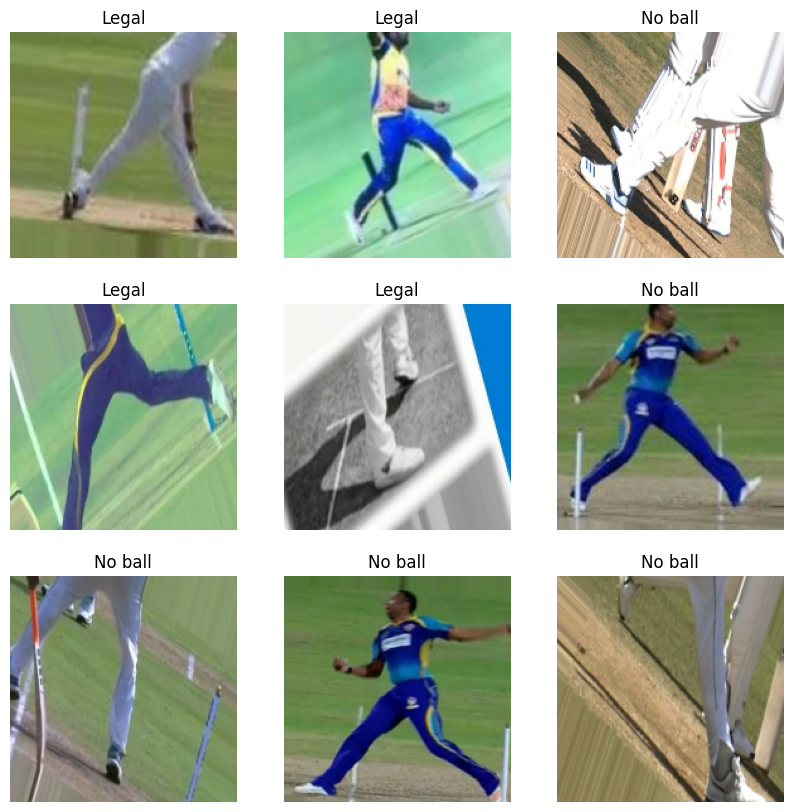

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
data_dir2= '/content/drive/MyDrive/Original dataset/testing'

In [18]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  validation_split=0.8,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 262 files belonging to 2 classes.
Using 209 files for validation.


In [19]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
56/56 [==============================] - 331s 6s/step - loss: 1.6317 - accuracy: 0.7116 - val_loss: 0.4996 - val_accuracy: 0.7703
Epoch 2/10
56/56 [==============================] - 7s 109ms/step - loss: 0.2700 - accuracy: 0.8777 - val_loss: 0.9499 - val_accuracy: 0.8373
Epoch 3/10
56/56 [==============================] - 6s 91ms/step - loss: 0.1284 - accuracy: 0.9613 - val_loss: 0.9093 - val_accuracy: 0.9043
Epoch 4/10
56/56 [==============================] - 7s 120ms/step - loss: 0.1903 - accuracy: 0.9416 - val_loss: 1.0647 - val_accuracy: 0.8804
Epoch 5/10
56/56 [==============================] - 6s 89ms/step - loss: 0.1068 - accuracy: 0.9618 - val_loss: 0.6775 - val_accuracy: 0.8900
Epoch 6/10
56/56 [==============================] - 6s 89ms/step - loss: 0.1022 - accuracy: 0.9675 - val_loss: 0.9156 - val_accuracy: 0.8947
Epoch 7/10
56/56 [==============================] - 6s 101ms/step - loss: 0.0393 - accuracy: 0.9888 - val_loss: 1.3237 - val_accuracy: 0.9091
Epoch 8/10

In [20]:
model.save('ball_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
test_loss, test_acc = model.evaluate(validation_ds)
print(f'Test accuracy: {test_acc}')

7/7 [==============================] - 2s 25ms/step - loss: 1.2537 - accuracy: 0.9091
Test accuracy: 0.9090909361839294


In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [36]:
model = tf.keras.models.load_model('ball_detection_model.h5')

In [37]:
img_path = '/content/drive/MyDrive/Original dataset/testing/No ball/No ball_0_10.jpeg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

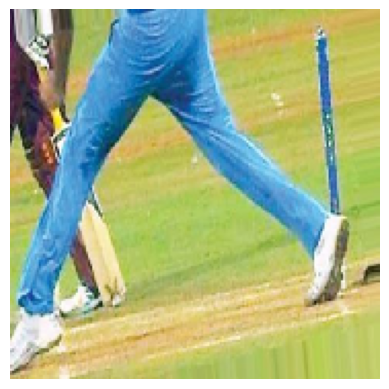

In [38]:
plt.imshow(img_array/255.0)
plt.axis('off')
plt.show()

In [39]:
prediction = model.predict(img)

1/1 [==============================] - 0s 92ms/step


In [40]:
print(prediction)
if prediction < 0.5:
    print("Prediction: Legal")
else:
    print("Prediction: No Ball")

[[1.]]
Prediction: No Ball


In [45]:
img_path = '/content/drive/MyDrive/Original dataset/testing/Legal/Legal_0_1164.jpeg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

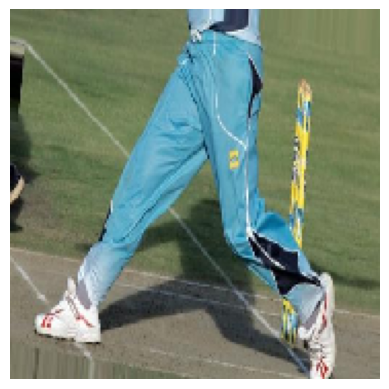

In [46]:
plt.imshow(img_array/255.0)
plt.axis('off')
plt.show()

In [47]:
prediction = model.predict(img)

1/1 [==============================] - 0s 26ms/step


In [48]:
print(prediction)
if prediction < 0.5:
    print("Prediction: Legal")
else:
    print("Prediction: No Ball")

[[7.3384313e-06]]
Prediction: Legal
